## Evaluate Performance for 1D bosonic RNN with and without Sz_tot=0

In [53]:
import numpy as np
import matplotlib.pyplot as plt
import os
import matplotlib.colors as colors
import matplotlib.cm as cmx
params = {
    "text.usetex": True,
    "font.family": "serif",
    "legend.fontsize": 14,
    "figure.figsize": (6, 4),
    "axes.labelsize": 16,
    "xtick.labelsize": 16,
    "ytick.labelsize": 16,
    "lines.linewidth": 2,
    "lines.markeredgewidth": 0.8,
    "lines.markersize": 8,
    "lines.marker": "o",
    "patch.edgecolor": "black",
}
plt.rcParams.update(params)
plt.style.use("seaborn-deep")

print(os.environ["PATH"])
os.environ["PATH"] += os.pathsep + '/opt/local/bin'
print(os.getenv("PATH"))

cm = plt.get_cmap('tab10') 
values = range(8)
cNorm  = colors.Normalize(vmin=0, vmax=values[-1])
sm = cmx.ScalarMappable(norm=cNorm, cmap=cm)


def load(sztot, folders):
    # load target observables
    target_obs = {}
    for obs in ["sxsx", "sysy", "szsz"]:
        target_obs[obs] = []
        for folder in folders:
            with open(sztot+folder+"target_"+obs+".txt") as f:
                target_obs[obs].append([float(item) for item in f.readlines()])


    # load observables from RNN reconstruction
    rnn_obs = {}
    for obs in ["sxsx", "sysy", "szsz"]:
        rnn_obs[obs] = []
        for folder in folders:
            rnn_obs[obs].append(np.load(sztot+folder+obs+".npy"))
    return target_obs, rnn_obs

def plot(folders, rnn_obs, target_obs):
    # plot
    fig, ax = plt.subplots(1,3, figsize=(13,4))
    for o, obs in enumerate(["sxsx", "sysy", "szsz"]):
        for f, folder in enumerate(folders):
            ax[o].plot(target_obs[obs][f], color = sm.to_rgba(f))
            ax[o].plot(rnn_obs[obs][f], color = sm.to_rgba(f), linestyle="dotted", marker="x")
            ax[o].plot([],[], color = sm.to_rgba(f), label = "$\Delta=$ "+folder.split("/")[0].split("=")[1])
        ax[o].legend(title=obs, title_fontsize=16, loc="upper right")
    plt.show()

/Users/hannah.lange/opt/anaconda3/bin:/Users/hannah.lange/opt/anaconda3/condabin:/opt/local/bin:/opt/local/sbin:/usr/local/bin:/System/Cryptexes/App/usr/bin:/usr/bin:/bin:/usr/sbin:/sbin:/Library/TeX/texbin:/usr/local/munki:/opt/local/bin:/opt/local/bin:/opt/local/bin:/opt/local/bin:/opt/local/bin:/opt/local/bin:/opt/local/bin:/opt/local/bin
/Users/hannah.lange/opt/anaconda3/bin:/Users/hannah.lange/opt/anaconda3/condabin:/opt/local/bin:/opt/local/sbin:/usr/local/bin:/System/Cryptexes/App/usr/bin:/usr/bin:/bin:/usr/sbin:/sbin:/Library/TeX/texbin:/usr/local/munki:/opt/local/bin:/opt/local/bin:/opt/local/bin:/opt/local/bin:/opt/local/bin:/opt/local/bin:/opt/local/bin:/opt/local/bin:/opt/local/bin


### Without constraint on Sz

In [54]:
folders = ["Delta=0/", "Delta=1/", "Delta=5/"]
target, rnn = load("without_total_sz=0/",folders)

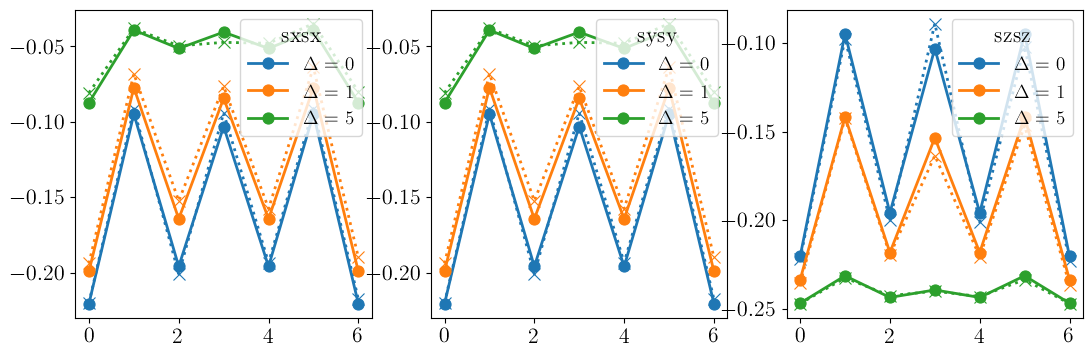

In [55]:
plot(folders, rnn, target)

but for $\Delta = -1$ and $\Delta = -0.5$:

In [56]:
folders = ["Delta=-0.5/", "Delta=-1/"]
target, rnn = load("without_total_sz=0/", folders)

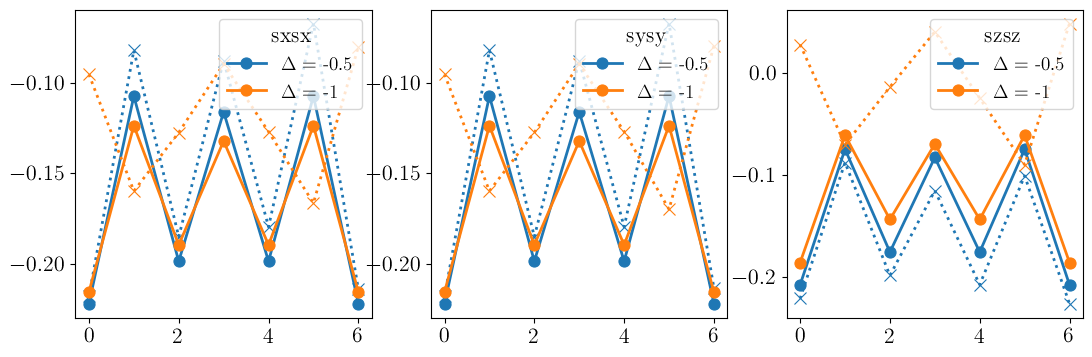

In [57]:
plot(folders, rnn, target)

### Without constraint on Sz

In [60]:
folders = ["Delta=0/", "Delta=-0.5/", "Delta=-1/"]
target, rnn = load("with_total_sz=0/", folders)

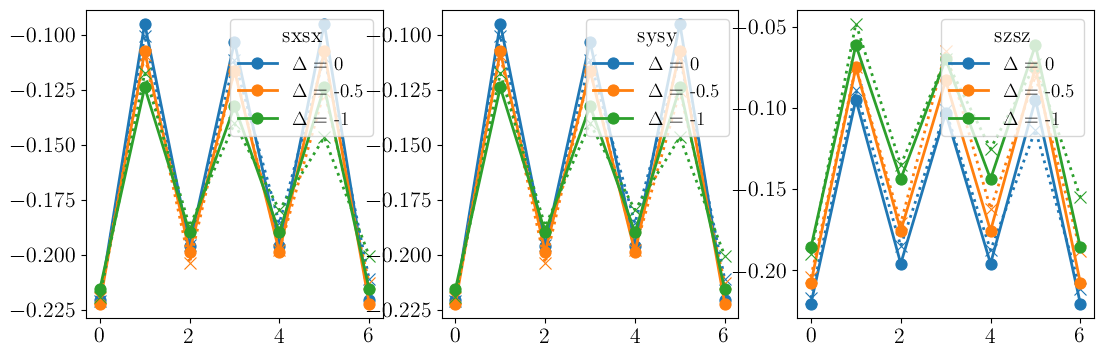

In [61]:
plot(folders, rnn, target)